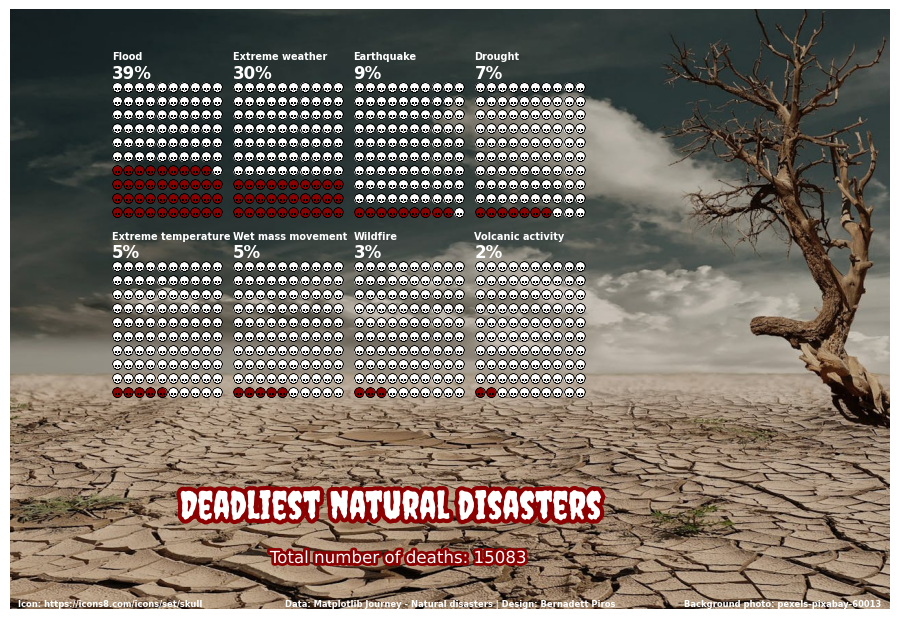

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
from pyfonts import load_font
from highlight_text import fig_text

url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/natural-disasters/natural-disasters.csv"
df = pd.read_csv(url)

creepster = load_font("https://github.com/google/fonts/blob/main/ofl/creepster/Creepster-Regular.ttf?raw=true")

img = Image.open("pexels-pixabay-60013.jpg")
icon = mpimg.imread("icons8-skull-30.png")

df_unpivot = pd.melt(df, id_vars='Year', value_vars=['Drought','Earthquake','Extreme temperature','Extreme weather',
                                                      'Flood','Volcanic activity','Wet mass movement','Wildfire'],
                      var_name='type', value_name='count')

grouped_df = df_unpivot.groupby(["type", "Year"])["count"].sum().reset_index()

df1 = grouped_df.groupby("type")["count"].sum().sort_values(ascending=False).reset_index()

types = df1["type"].unique()

df1["pct"] = ((df1["count"] / df1["count"].sum())*100).round().astype(int)

X = np.repeat(np.arange(1,11), 10)
Y = np.tile(np.arange(1,11), 10)

df1["color"] = "darkred"
dot_color = "white"
dot_colors = []
for color, pct in zip(df1["color"], df1["pct"]):
    dot_colors.append([color] * int(pct) + [dot_color] * (100 - int(pct)))

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(9, 6), )
plt.subplots_adjust(right=0.65, bottom=0.35, wspace=.1, hspace=.3)

for ax in axs.flat:
    ax.patch.set_alpha(0.1) 
    
bg_ax = plt.axes([0, 0, 1, 1]) 
bg_ax.set_zorder(-1) 
bg_ax.imshow(img) 
bg_ax.axis("off")

def define_path_effect(**kwargs):
    return [path_effects.Stroke(**kwargs), path_effects.Normal()]


my_path_effect = define_path_effect(
    linewidth=6,
    foreground="darkred"
)

for ax, pct, t, dot_color in zip(axs.flat, df1["pct"], types, dot_colors):
    ax.scatter(Y, X, c=dot_color) 
    
    for x, y in zip(X, Y):
        imagebox = OffsetImage(icon, zoom=0.3)  
        ab = AnnotationBbox(imagebox, (y, x), frameon=False)
        ax.add_artist(ab)
        
    ax.text(0.5, 12, t, c="white", size=7, weight="bold")
    ax.text(0.5, 10.7, f'{pct}%', c="white", size=12, weight="bold")
    ax.axis("off")    
       
fig_text(0.2, 0.2, "<Deadliest natural disasters>", fontsize=28, font=creepster,
         highlight_textprops=[
             {"path_effects": my_path_effect,
              "color": "white"}])

my_path_effect2 = define_path_effect(
    linewidth=4,
    foreground="darkred"
)

fig_text(0.3, 0.1, s=f"<Total number of deaths: {df1['count'].sum().astype(int)}>", fontsize=12,
         highlight_textprops=[
             {"path_effects": my_path_effect2,
              "color": "white"}])

fig.text(0.02, 0.005, "Icon: https://icons8.com/icons/set/skull", fontsize=6, color="white", weight="bold" )
fig.text(0.76, 0.005, "Background photo: pexels-pixabay-60013", fontsize=6, color="white", weight="bold")

fig.text(0.5, 0.005, "Data: Matplotlib Journey - Natural disasters | Design: Bernadett Piros",
         size=6, ha="center", color="white", weight="bold")

plt.show()  

#plt.savefig("waffle_natural_disasters", dpi=300, bbox_inches='tight', pad_inches=0.2)